In [1]:
import tweepy as tw
# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd
import datetime as dt
# Import seaborn and matplotlib
from matplotlib import pyplot as plt
import csv
import seaborn as sns

Importing data

In [2]:
df = pd.read_csv('/content/covid19_tweets.csv',encoding='latin-1')

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
#remove unimportant columns
df.drop(["user_name", "user_description", "user_created", "user_followers", "user_friends", "user_favourites", "hashtags", "is_retweet", "hashtags", "user_verified"],axis=1,inplace=True)

In [5]:
df = df.head(40000)

# Nouvelle section
Data preprocessing

1-Cleaning Data

In [6]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['rt', '#coronavirus']

import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
def tweets(tweet):
    tweet = tweet.lower()
    tweet.replace('[^s\n\n]', '')
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", tweet)
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub(r"[,\!\?\%\(\)\/\"]", "", tweet)
    tweet = re.sub(r"\&\S*\s", "", tweet)
    tweet = re.sub(r"\&", "", tweet)
    tweet = re.sub(r"\+", "", tweet)
    tweet = re.sub(r"\#", "", tweet)
    tweet = re.sub(r"\$", "", tweet)
    tweet = re.sub(r"\£", "", tweet)
    tweet = re.sub(r"\%", "", tweet)
    tweet = re.sub(r"\:", "", tweet)
    tweet = re.sub(r"\@", "", tweet)
    tweet = re.sub(r"\-", "", tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = " ".join(word for word in tweet.split() if word not in stop_words)
    tweet = " ".join(Word(word).lemmatize() for word in tweet.split())
    return(tweet)
df['processed_tweet'] = df['text'].astype(str).apply(lambda row: tweets(row))
#df['processed tweet'] = df['Tweet'].apply(lambda x: tweets(x, custom_stopwords))
df.head(10)

,user_location,date,text,source,processed_tweet
0,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,Twitter for iPhone,smelled scent hand sanitizers today someone pa...
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Twitter for Android,hey yankee yankeespr mlb wouldnt made sense pl...
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Twitter for Android,wdunlap realdonaldtrump trump never claimed ho...
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,Twitter for iPhone,brookbanktv one gift give appreciation simple ...
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,Twitter for Android,july medium bulletin novel coronavirusupdates ...
5,ÐÐ¾Ð²Ð¾ÑÐ¾ÌÑÑÐ¸Ñ,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,Twitter Web App,coronavirus death continue rise almost bad eve...
6,"Gainesville, FL",2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,Buffer,change work general recruiting specifically vi...
7,NaN,2020-07-25 12:27:00,You now have to wear face coverings when out s...,TweetDeck,wear face covering shopping includes visit loc...
8,NaN,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,Twitter for Android,praying good health recovery chouhanshivraj co...
9,ðð»location at link belowðð»,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,Twitter for iPhone,pope god prophet sadhu sundar selvaraj watch h...


In [8]:
def remove_emoji(tweet):

  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])"
  )
  tweet = re.sub(EMOJI_PATTERN, r' \1 ', tweet)
  return tweet

2-Calculate polarity

In [9]:
# Calculate polarity
def get_sentiment(Tweet):
    blob = TextBlob(Tweet)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result
#df['polarity'] = df['processed tweet'].apply(lambda x: TextBlob(x).sentiment[0])
#df['subjectivity'] = df['processed tweet'].apply(lambda x: TextBlob(x).sentiment[1])
#df.head()

In [10]:
ex1 = df['processed_tweet'].iloc[0]

In [11]:
get_sentiment(ex1)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [12]:
df['sentiment_results'] = df['processed_tweet'].apply(get_sentiment)
df['sentiment_results']

0       {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.0, 'subjectivity': 0.3571428571...
4       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
5471    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5472    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5473    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5474    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5475    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 5476, dtype: object

In [13]:
df['sentiment_results'].iloc[1]

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [14]:
pd.json_normalize(df['sentiment_results'].iloc[1])

,polarity,subjectivity,sentiment
0,0.0,0.0,Neutral


In [15]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [16]:
df.head(1)

,user_location,date,text,source,processed_tweet,sentiment_results,polarity,subjectivity,sentiment
0,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,Twitter for iPhone,smelled scent hand sanitizers today someone pa...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.25,Negative


In [17]:
df = df[['sentiment', 'polarity', 'processed_tweet', 'date']]
df

,sentiment,polarity,processed_tweet,date
0,Negative,-0.25,smelled scent hand sanitizers today someone pa...,2020-07-25 12:27:21
1,Neutral,0.00,hey yankee yankeespr mlb wouldnt made sense pl...,2020-07-25 12:27:17
2,Neutral,0.00,wdunlap realdonaldtrump trump never claimed ho...,2020-07-25 12:27:14
3,Neutral,0.00,brookbanktv one gift give appreciation simple ...,2020-07-25 12:27:10
4,Neutral,0.00,july medium bulletin novel coronavirusupdates ...,2020-07-25 12:27:08
...,...,...,...,...
5471,Neutral,0.00,blog kathy scott director operation considers ...,2020-07-25 09:00:00
5472,Neutral,0.00,ascionline working overtime flag misleading ad...,2020-07-25 09:00:00
5473,Neutral,0.00,news u million opecfund loan elsalvador suppor...,2020-07-25 09:00:00
5474,Neutral,0.00,professor ged byrne director global engagement...,2020-07-25 09:00:00


3-Split data

In [18]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['processed_tweet'],
                                                                    df['sentiment'],test_size=0.3)

In [20]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [21]:
Tfidf_vect = TfidfVectorizer(max_features=40000)
Tfidf_vect.fit(df['processed_tweet'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [22]:
print(Train_X_Tfidf)

  (0, 13734)	0.35990132988527657
  (0, 9283)	0.600224522050594
  (0, 8294)	0.39211627576898944
  (0, 7285)	0.3544394525043305
  (0, 2780)	0.2408681864489616
  (0, 1972)	0.41569408634020993
  (1, 12245)	0.22329974244872727
  (1, 11334)	0.364261541351607
  (1, 9320)	0.2450453976070551
  (1, 8805)	0.364261541351607
  (1, 6792)	0.38803453451537506
  (1, 6335)	0.2768213485479821
  (1, 5465)	0.30761943921170626
  (1, 4909)	0.2681875463756073
  (1, 4696)	0.29105268635477655
  (1, 3087)	0.1827408533219743
  (1, 860)	0.33594049028165657
  (2, 13796)	0.25700606971224094
  (2, 13776)	0.33223294862370983
  (2, 13714)	0.267104357745173
  (2, 11968)	0.24963433106308888
  (2, 10923)	0.2404716510034694
  (2, 10228)	0.3934071470372035
  (2, 10096)	0.3934071470372035
  (2, 9328)	0.33223294862370983
  :	:
  (3831, 14008)	0.2222252770432845
  (3831, 12721)	0.32883700203169725
  (3831, 12464)	0.2570618620011811
  (3831, 11406)	0.3138813706393227
  (3831, 10497)	0.26274772917021355
  (3831, 10051)	0.2371809

In [23]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Nouvelle section
Classification

1-Naive Bayes

In [24]:
# Classifier - Algorithm - Naive Bayes
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  70.66342057212415


In [25]:
# basic method

print('Accuracy Score: {:.4f}'.format(accuracy_score(predictions_NB, Test_Y)))
print('SVC f1-score  : {:.4f}'.format(f1_score(predictions_NB, Test_Y, average='micro')))
print('SVC precision : {:.4f}'.format(precision_score(predictions_NB, Test_Y, average='micro')))
print('SVC recall    : {:.4f}'.format(recall_score(predictions_NB, Test_Y, average='micro')))
print("\n",classification_report(predictions_NB, Test_Y))

Accuracy Score: 0.7066
SVC f1-score  : 0.7066
SVC precision : 0.7066
SVC recall    : 0.7066

               precision    recall  f1-score   support

           0       0.14      1.00      0.25        37
           1       0.83      0.68      0.75       853
           2       0.80      0.72      0.76       753

    accuracy                           0.71      1643
   macro avg       0.59      0.80      0.58      1643
weighted avg       0.80      0.71      0.74      1643



2-SVM

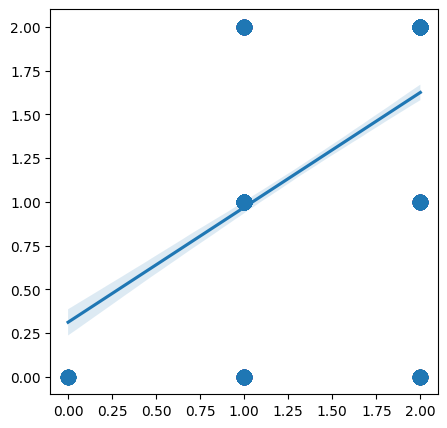

In [26]:
plt.figure(figsize=(5,5))
sns.regplot(x=predictions_NB, y=Test_Y, fit_reg=True, scatter_kws={"s": 100})
plt.savefig("naive_bayes.png")
plt.show()

In [27]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  80.46256847230676


In [28]:
# basic method

print('Accuracy Score: {:.4f}'.format(accuracy_score(predictions_SVM, Test_Y)))
print('SVC f1-score  : {:.4f}'.format(f1_score(predictions_SVM, Test_Y, average='micro')))
print('SVC precision : {:.4f}'.format(precision_score(predictions_SVM, Test_Y, average='micro')))
print('SVC recall    : {:.4f}'.format(recall_score(predictions_SVM, Test_Y, average='micro')))
print("\n",classification_report(predictions_SVM, Test_Y))

Accuracy Score: 0.8046
SVC f1-score  : 0.8046
SVC precision : 0.8046
SVC recall    : 0.8046

               precision    recall  f1-score   support

           0       0.45      0.94      0.61       125
           1       0.97      0.72      0.82       945
           2       0.77      0.92      0.84       573

    accuracy                           0.80      1643
   macro avg       0.73      0.86      0.76      1643
weighted avg       0.86      0.80      0.81      1643



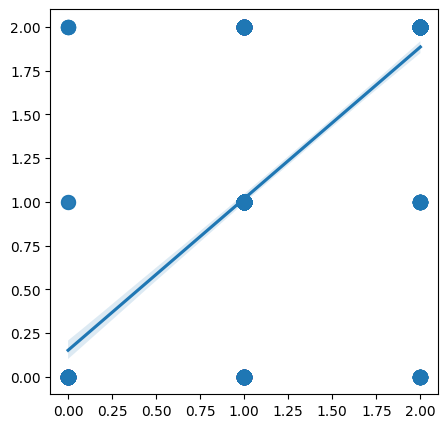

In [29]:
plt.figure(figsize=(5,5))
sns.regplot(x=predictions_SVM, y=Test_Y, fit_reg=True, scatter_kws={"s": 100})
plt.show()

3-KNN

In [31]:
# Classifier - Algorithm - KNN
# fit the training dataset on the classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # Choisissez le nombre de voisins souhaité (ici 5)
knn.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation dataset
predictions_knn = knn.predict(Test_X_Tfidf)
# Utilisez la fonction accuracy_score pour obtenir la précision
from sklearn.metrics import accuracy_score
print("KNN Accuracy Score -> ", accuracy_score(predictions_knn, Test_Y) * 100)


KNN Accuracy Score ->  58.97748021911138


# Nouvelle section
Using Deep Learning

In [58]:
X = df.processed_tweet
Y = df.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [60]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [61]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [62]:
train_text, test_text, train_y, test_y = train_test_split(df['processed_tweet'],df['polarity'],test_size = 0.2)

In [63]:
train_text.shape

(4380,)

In [64]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

sequences_test = tokenizer.texts_to_sequences(texts_test)
test_sequences_matrix = sequence.pad_sequences(sequences_test,maxlen=max_len)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12759 unique tokens.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [65]:
sequences[0]

[1622, 150, 40, 125, 1623, 2709, 961, 80, 2045, 4338]

In [66]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 12759)

In [67]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [68]:
" ".join([index_to_word[i] for i in sequences[0]])

'glimpse plan india response kerala supported vulnerable family dry rationâ\x80¦'

In [69]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 9.7
max length: 16


In [70]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (4380, 150)
Shape of data test tensor: (1096, 150)


In [71]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', test_y.shape)

Shape of label tensor: (1096,)


1-Global Average Pooling Neural Network


In [73]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 2
#Global Average Pooling Neural Network
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)
#L'utilisation du bloc de mise en commun 1D Global average peut remplacer les blocs entièrement connectés de votre CNN.
average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model_1 = Model(sequence_input, predictions)
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           1000000   
                                                                 
 global_average_pooling1d_2  (None, 50)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 1000102 (3.82 MB)
Trainable params: 1000102 (3.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history = model_1.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128, verbose=2)

Epoch 1/10
31/31 - 4s - loss: 0.6195 - acc: 0.8359 - val_loss: 0.5135 - val_acc: 0.9932 - 4s/epoch - 114ms/step
Epoch 2/10
31/31 - 2s - loss: 0.4250 - acc: 0.9901 - val_loss: 0.3307 - val_acc: 0.9932 - 2s/epoch - 70ms/step
Epoch 3/10
31/31 - 1s - loss: 0.2622 - acc: 0.9901 - val_loss: 0.1930 - val_acc: 0.9932 - 1s/epoch - 48ms/step
Epoch 4/10
31/31 - 2s - loss: 0.1561 - acc: 0.9901 - val_loss: 0.1157 - val_acc: 0.9932 - 2s/epoch - 51ms/step
Epoch 5/10
31/31 - 2s - loss: 0.1022 - acc: 0.9901 - val_loss: 0.0792 - val_acc: 0.9932 - 2s/epoch - 56ms/step
Epoch 6/10
31/31 - 1s - loss: 0.0777 - acc: 0.9901 - val_loss: 0.0616 - val_acc: 0.9932 - 999ms/epoch - 32ms/step
Epoch 7/10
31/31 - 1s - loss: 0.0660 - acc: 0.9901 - val_loss: 0.0531 - val_acc: 0.9932 - 560ms/epoch - 18ms/step
Epoch 8/10
31/31 - 1s - loss: 0.0603 - acc: 0.9901 - val_loss: 0.0483 - val_acc: 0.9932 - 757ms/epoch - 24ms/step
Epoch 9/10
31/31 - 1s - loss: 0.0571 - acc: 0.9901 - val_loss: 0.0455 - val_acc: 0.9932 - 695ms/epoch 

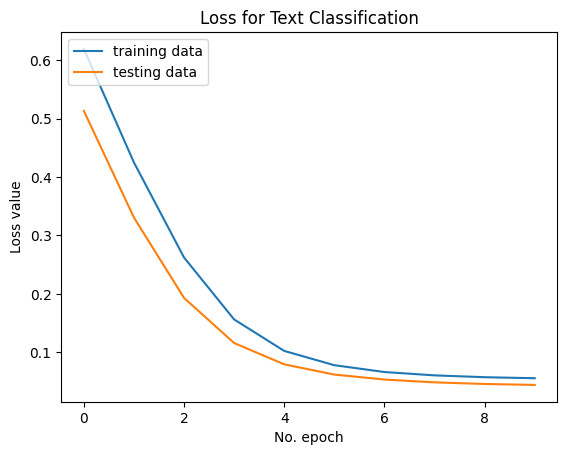

In [75]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='testing data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

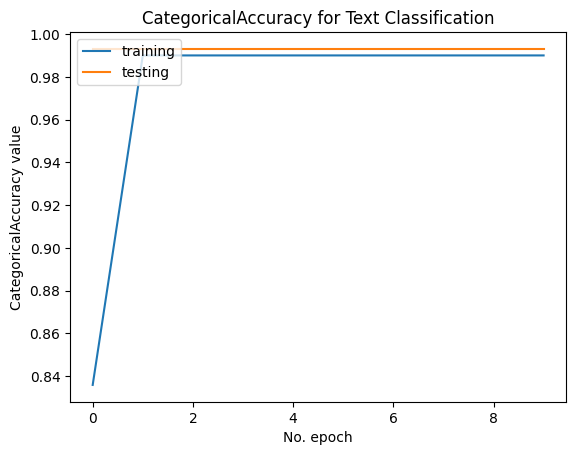

In [76]:
plt.plot(history.history['acc'], label='training')
plt.plot(history.history['val_acc'], label='testing')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

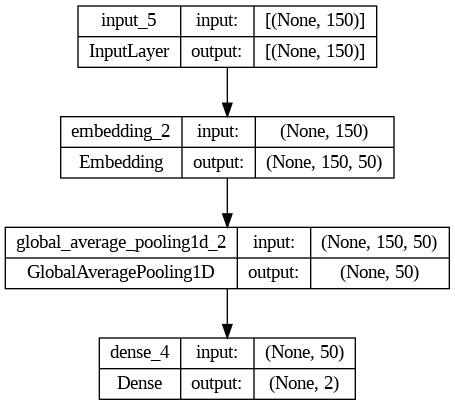

In [78]:
import tensorflow as tf
tf.keras.utils.plot_model(model_1, "simpleNN_model.png", show_shapes=True)

RNN with LSTM layer

In [79]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers

from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(2, activation='softmax')(x)


model_2 = Model(sequence_input, predictions)
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model_2.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           1000000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               91648     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1091906 (4.17 MB)
Trainable params: 1091906 (4.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
history2 = model_2.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128,verbose=1)

Epoch 1/10
31/31 [==============================] - 24s 651ms/step - loss: 0.1281 - acc: 0.9909 - val_loss: 0.0406 - val_acc: 0.9932
Epoch 2/10
31/31 [==============================] - 24s 773ms/step - loss: 0.0391 - acc: 0.9901 - val_loss: 0.0392 - val_acc: 0.9932
Epoch 3/10
31/31 [==============================] - 18s 581ms/step - loss: 0.0240 - acc: 0.9944 - val_loss: 0.0401 - val_acc: 0.9932
Epoch 4/10
31/31 [==============================] - 17s 539ms/step - loss: 0.0135 - acc: 0.9964 - val_loss: 0.0397 - val_acc: 0.9932
Epoch 5/10
31/31 [==============================] - 17s 546ms/step - loss: 0.0048 - acc: 0.9995 - val_loss: 0.0421 - val_acc: 0.9932
Epoch 6/10
31/31 [==============================] - 17s 553ms/step - loss: 0.0034 - acc: 0.9992 - val_loss: 0.0379 - val_acc: 0.9932
Epoch 7/10
31/31 [==============================] - 16s 515ms/step - loss: 0.0025 - acc: 0.9995 - val_loss: 0.0443 - val_acc: 0.9932
Epoch 8/10
31/31 [==============================] - 18s 573ms/step - 

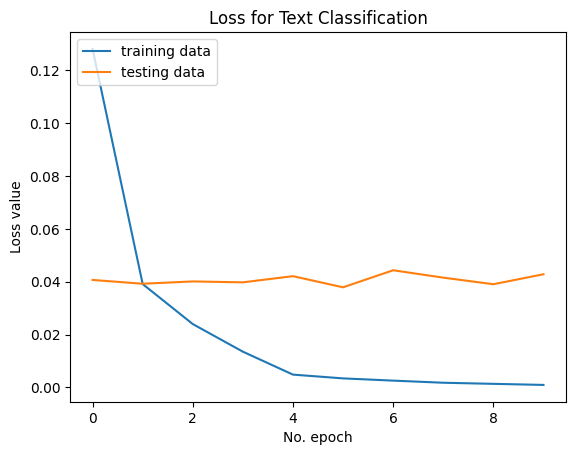

In [81]:
plt.plot(history2.history['loss'], label='training data')
plt.plot(history2.history['val_loss'], label='testing data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

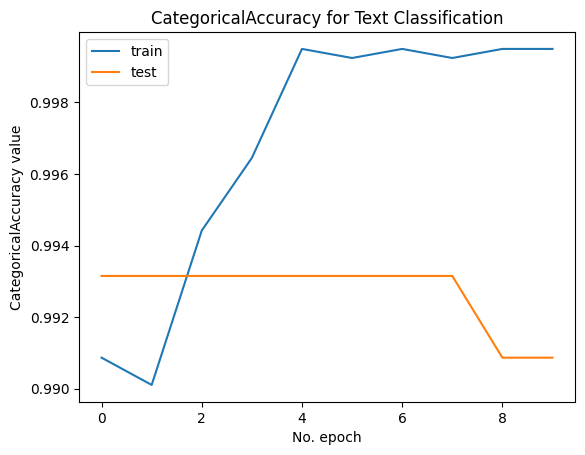

In [82]:
#plt.plot(history1.history['accuracy'], label='training data')
plt.plot(history2.history['acc'], label='train')

#plt.plot(history1.history['val_accuracy'], label='validation data')
plt.plot(history2.history['val_acc'], label='test')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

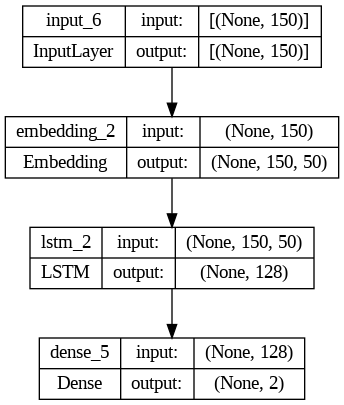

In [83]:
tf.keras.utils.plot_model(model_2, "simpleNN_model.png", show_shapes=True)

3-CNN with LSTM layer

In [84]:
#CNN model
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = Dropout(0.2)(x)
x = LSTM(64)(x)
predictions = Dense(2, activation='softmax')(x)

model_3 = Model(sequence_input, predictions)
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model_3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           1000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 146, 64)           16064     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 29, 64)            0         
 g1D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 29, 64)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 25, 64)            20544     
                                                           

In [85]:
history3 = model_3.fit(x_train, y_train, validation_split=0.6,
          epochs=10, batch_size=128)

Epoch 1/10
14/14 [==============================] - 5s 196ms/step - loss: 0.1183 - acc: 0.9926 - val_loss: 0.0728 - val_acc: 0.9890
Epoch 2/10
14/14 [==============================] - 1s 100ms/step - loss: 0.0470 - acc: 0.9926 - val_loss: 0.0622 - val_acc: 0.9890
Epoch 3/10
14/14 [==============================] - 1s 96ms/step - loss: 0.0426 - acc: 0.9926 - val_loss: 0.0579 - val_acc: 0.9890
Epoch 4/10
14/14 [==============================] - 1s 95ms/step - loss: 0.0407 - acc: 0.9926 - val_loss: 0.0572 - val_acc: 0.9890
Epoch 5/10
14/14 [==============================] - 1s 58ms/step - loss: 0.0379 - acc: 0.9926 - val_loss: 0.0530 - val_acc: 0.9890
Epoch 6/10
14/14 [==============================] - 1s 48ms/step - loss: 0.0299 - acc: 0.9926 - val_loss: 0.0382 - val_acc: 0.9890
Epoch 7/10
14/14 [==============================] - 1s 67ms/step - loss: 0.0193 - acc: 0.9926 - val_loss: 0.0301 - val_acc: 0.9909
Epoch 8/10
14/14 [==============================] - 1s 68ms/step - loss: 0.0130 -

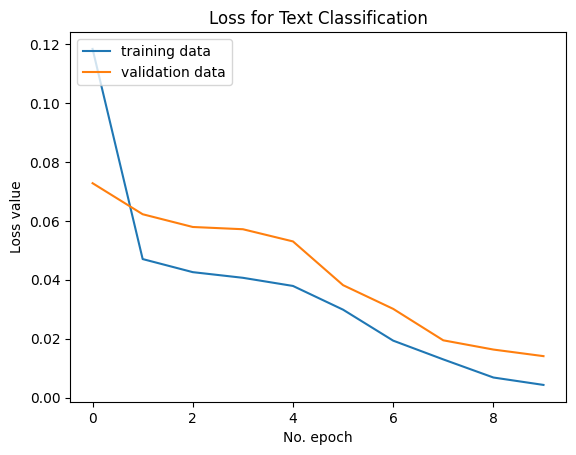

In [86]:
plt.plot(history3.history['loss'], label='training data')
plt.plot(history3.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

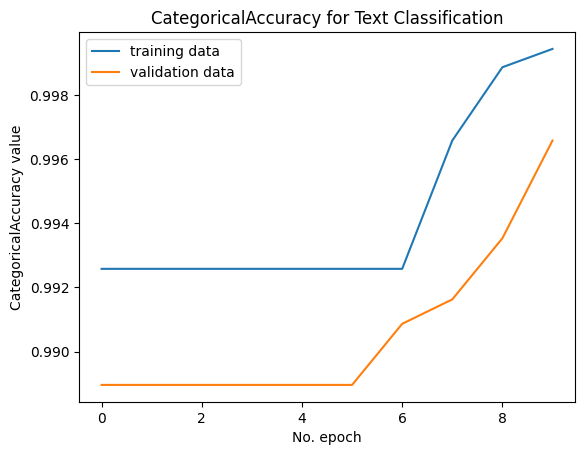

In [87]:
#plt.plot(history1.history['accuracy'], label='training data')
plt.plot(history3.history['acc'], label='training data')

#plt.plot(history1.history['val_accuracy'], label='validation data')
plt.plot(history3.history['val_acc'], label='validation data')

plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

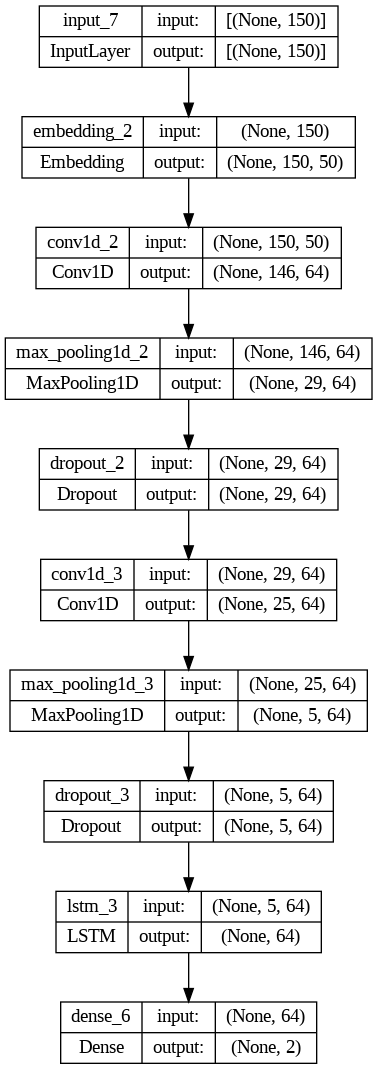

In [88]:
tf.keras.utils.plot_model(model_3, "simpleNN_model.png", show_shapes=True)